<a href="https://colab.research.google.com/github/MartinSomsak00/MLF/blob/main/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, SimpleRNN
from tensorflow.keras.optimizers import Adam

In [2]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [3]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

In [4]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [5]:
no_training_epochs = 5

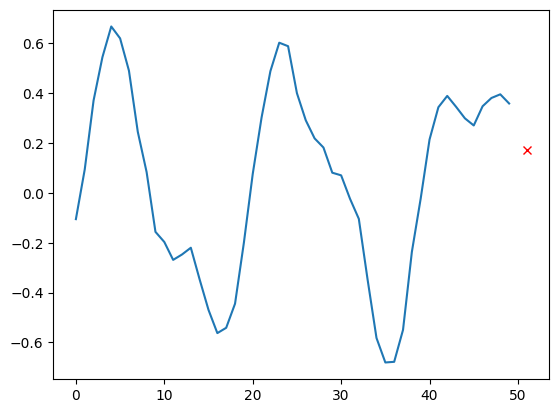

In [6]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

In [7]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [9]:
model_linear.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2459 - mean_squared_error: 0.2459 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0082 - val_mean_squared_error: 0.0082


In [12]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

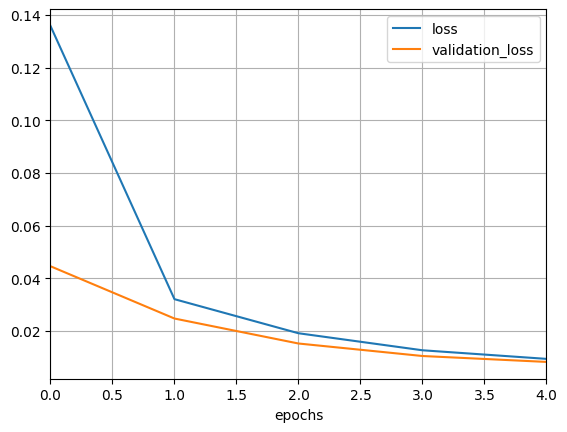

In [13]:
plot_function(history_linear)

In [14]:

score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.008288600482046604
Test MSE:  0.008288600482046604


In [15]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:

learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [17]:

history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.1933 - mean_squared_error: 0.1933 - val_loss: 0.1665 - val_mean_squared_error: 0.1665
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1570 - mean_squared_error: 0.1570 - val_loss: 0.1404 - val_mean_squared_error: 0.1404
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1353 - mean_squared_error: 0.1353 - val_loss: 0.1167 - val_mean_squared_error: 0.1167
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1098 - mean_squared_error: 0.1098 - val_loss: 0.0927 - val_mean_squared_error: 0.0927
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0896 - mean_squared_error: 0.0896 - val_loss: 0.0721 - val_mean_squared_error: 0.0721


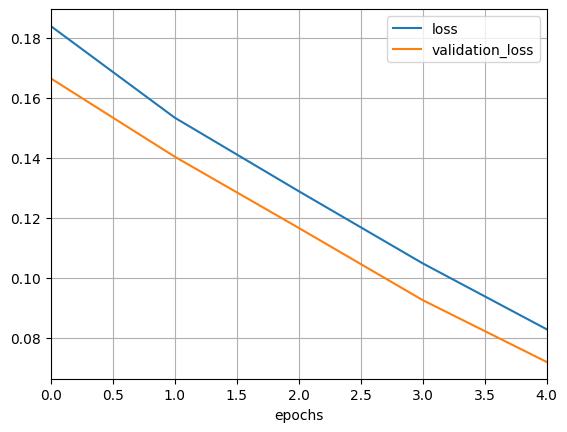

In [18]:

plot_function(history_simple_rnn)

In [19]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(30, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(30, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [20]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [21]:

history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


In [22]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.00307395588606596
Test MSE:  0.00307395588606596


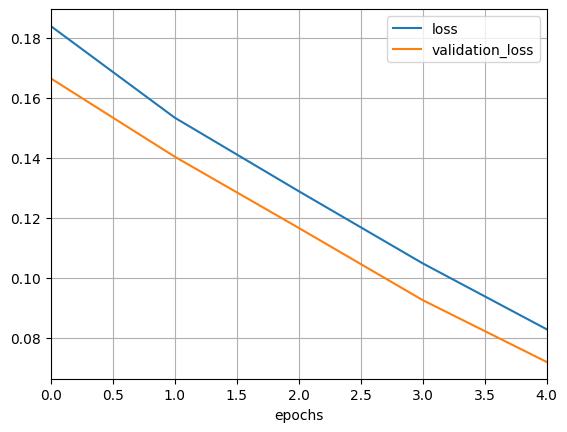

In [23]:
plot_function(history_simple_rnn)

Exercise 2 - The movie review
Based on the written rewiev, classify if the movie if good or bad


In [24]:
!pip install keras

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam




In [26]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [27]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [29]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [30]:
max_length = 200  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [31]:
embed_size = 128
vocabulary_size = 5000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:

optimizer = Adam(learning_rate = 0.001)

In [33]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [34]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)

X_train shape: (25000, 200)
y_train shape: (25000,)
X_train dtype: int32
y_train dtype: int64


In [35]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.5066 - loss: 0.6941 - val_accuracy: 0.5164 - val_loss: 0.6895
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.7123 - loss: 0.5185 - val_accuracy: 0.8718 - val_loss: 0.3098
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9088 - loss: 0.2293 - val_accuracy: 0.8718 - val_loss: 0.3137
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.9455 - loss: 0.1491 - val_accuracy: 0.8670 - val_loss: 0.3578
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9688 - loss: 0.0925 - val_accuracy: 0.8530 - val_loss: 0.4219


In [36]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.45550450682640076
Test accuracy:  84.26399827003479 %


While experimenting with the code to improve results, I first switched from a simple RNN to a GRU model, which significantly helped. Additionally, I adjusted the maximum length of reviews and the vocabulary size.
